In [1]:
from experiments import ai_comparison_experiments
from multiprocessing import Pool

from chainreaction.game import *
from chainreaction.positions import *
from chainreaction.board import *
from chainreaction.four_players import *
from chainreaction.mcts import *
from chainreaction.minimax import *
from chainreaction.team_mcts import *
from chainreaction.team_minimax import *

from experiments.utils import *
from functools import partial
from itertools import *

from experiments import team_experiments

import matplotlib.pyplot as plt

In [2]:
pool = Pool(16)

In [3]:
configs = [
    {
    'name': 'A',
    'team_players': [FourPlayers.P1, FourPlayers.P2],
    'ind_players': [FourPlayers.P3, FourPlayers.P4]
    },

    {
    'name': 'B',
    'team_players': [FourPlayers.P2, FourPlayers.P3],
    'ind_players': [FourPlayers.P1, FourPlayers.P4]
    },

    {
    'name':'C',
    'team_players': [FourPlayers.P3, FourPlayers.P4],
    'ind_players': [FourPlayers.P1, FourPlayers.P2]
    },

    {
    'name': 'D',
    'team_players': [FourPlayers.P1, FourPlayers.P4],
    'ind_players': [FourPlayers.P2, FourPlayers.P3]
    },

    {
    'name': 'E',
    'team_players': [FourPlayers.P1, FourPlayers.P3],
    'ind_players': [FourPlayers.P2, FourPlayers.P4]
    },

    {
    'name': 'F',
    'team_players': [FourPlayers.P2, FourPlayers.P4],
    'ind_players': [FourPlayers.P1, FourPlayers.P3]
    },
]

# Minimax

In [5]:
def run_for_config_minimax(config, max_level):
    win_together_rates = []
    ind_win_rates = []
    fail_together_rates = []

    for i in range(1, max_level):
        ai_step = partial(minimax_step, max_depth=i)
        config['team_players_ai'] = [ai_step, ai_step]
        config['ind_players_ai'] = [ai_step, ai_step]
        win_together, fail_together, ind_win = team_experiments.run_experiments(pool, config, 50)
        win_together_rates.append(win_together)
        ind_win_rates.append(ind_win)
        fail_together_rates.append(fail_together)

    return win_together_rates, ind_win_rates, fail_together_rates

In [6]:
fig, axs = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Expecti-Maxn simulations')

max_level = 6

for init_config, ax in zip(configs, chain.from_iterable(axs)):
    win_together_rates, ind_win_rates, fail_together_rates = run_for_config_minimax(init_config, max_level)
    ax.plot(range(1, max_level), win_together_rates, label='win together')
    ax.plot(range(1, max_level), ind_win_rates, label='win separately')
    ax.plot(range(1, max_level), fail_together_rates, label='loose together')
    ax.legend(loc="upper right")
    ax.set_title(f'Board configuration: {init_config["name"]}')



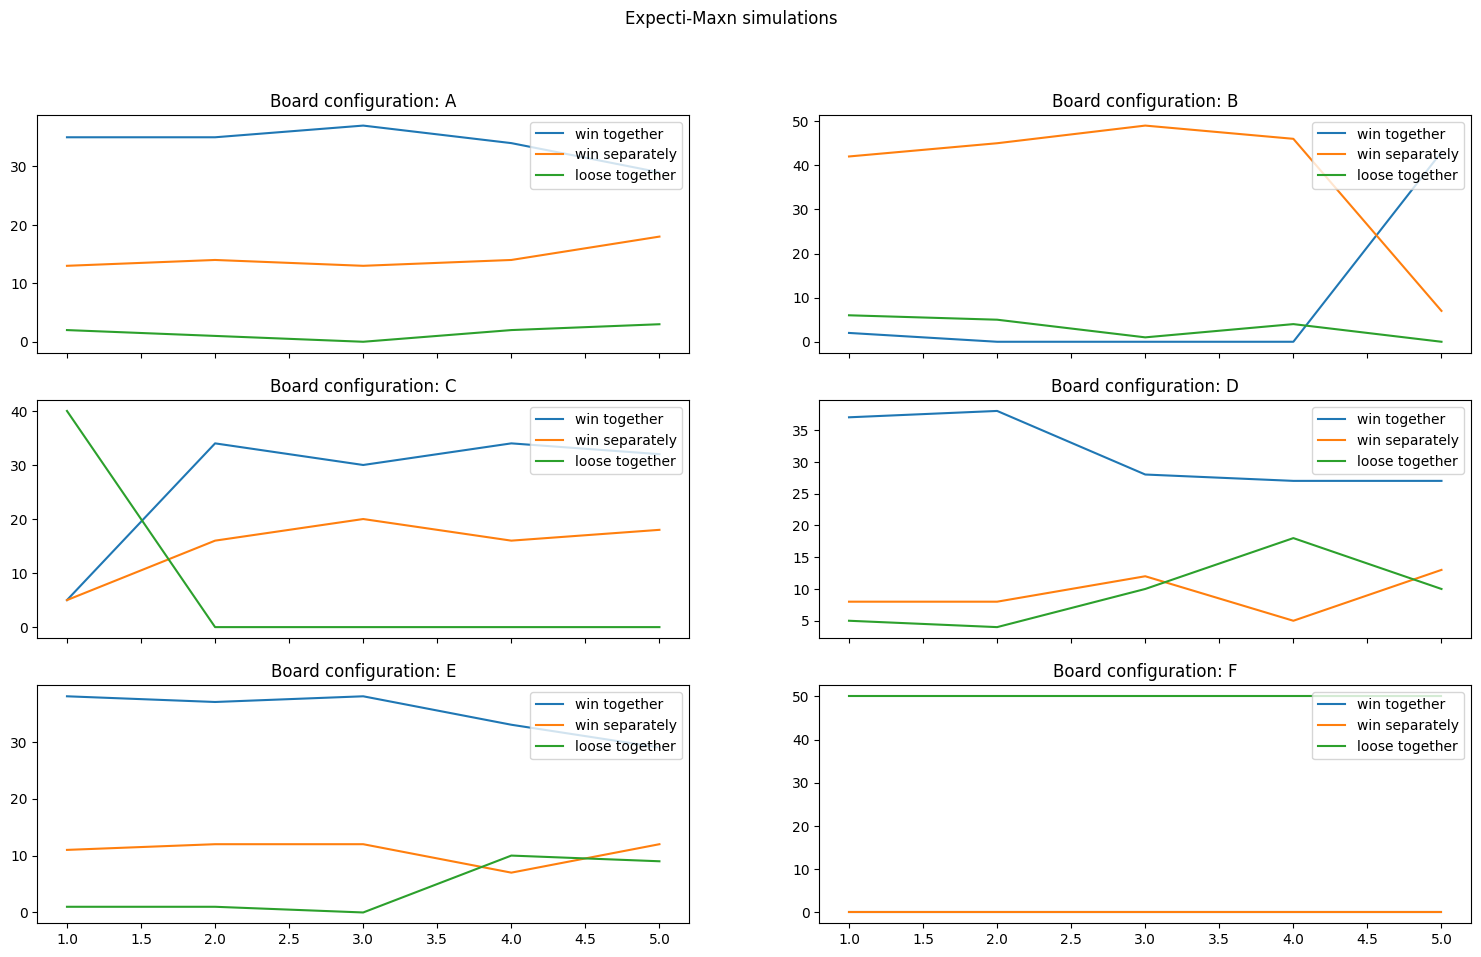

In [7]:
plt.show()

# MCTS

In [7]:
def run_for_config_mcts(config, max_level):
    win_together_rates = []
    ind_win_rates = []
    fail_together_rates = []

    for i in range(1, max_level):
        ai_step = partial(mcts_step, num_simulations=i * 1000)
        config['team_players_ai'] = [ai_step, ai_step]
        config['ind_players_ai'] = [ai_step, ai_step]
        win_together, fail_together, ind_win = team_experiments.run_experiments(pool, config, 50)
        win_together_rates.append(win_together)
        ind_win_rates.append(ind_win)
        fail_together_rates.append(fail_together)

    return win_together_rates, ind_win_rates, fail_together_rates

In [8]:
fig, axs = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('MCTS simulations')

max_level = 6

for init_config, ax in zip(configs, chain.from_iterable(axs)):
    win_together_rates, ind_win_rates, fail_together_rates = run_for_config_mcts(init_config, max_level)
    ax.plot(range(1, max_level), win_together_rates, label='win together')
    ax.plot(range(1, max_level), ind_win_rates, label='win separately')
    ax.plot(range(1, max_level), fail_together_rates, label='loose together')
    ax.legend(loc="upper right")
    ax.set_title(f'Board configuration: {init_config["name"]}')


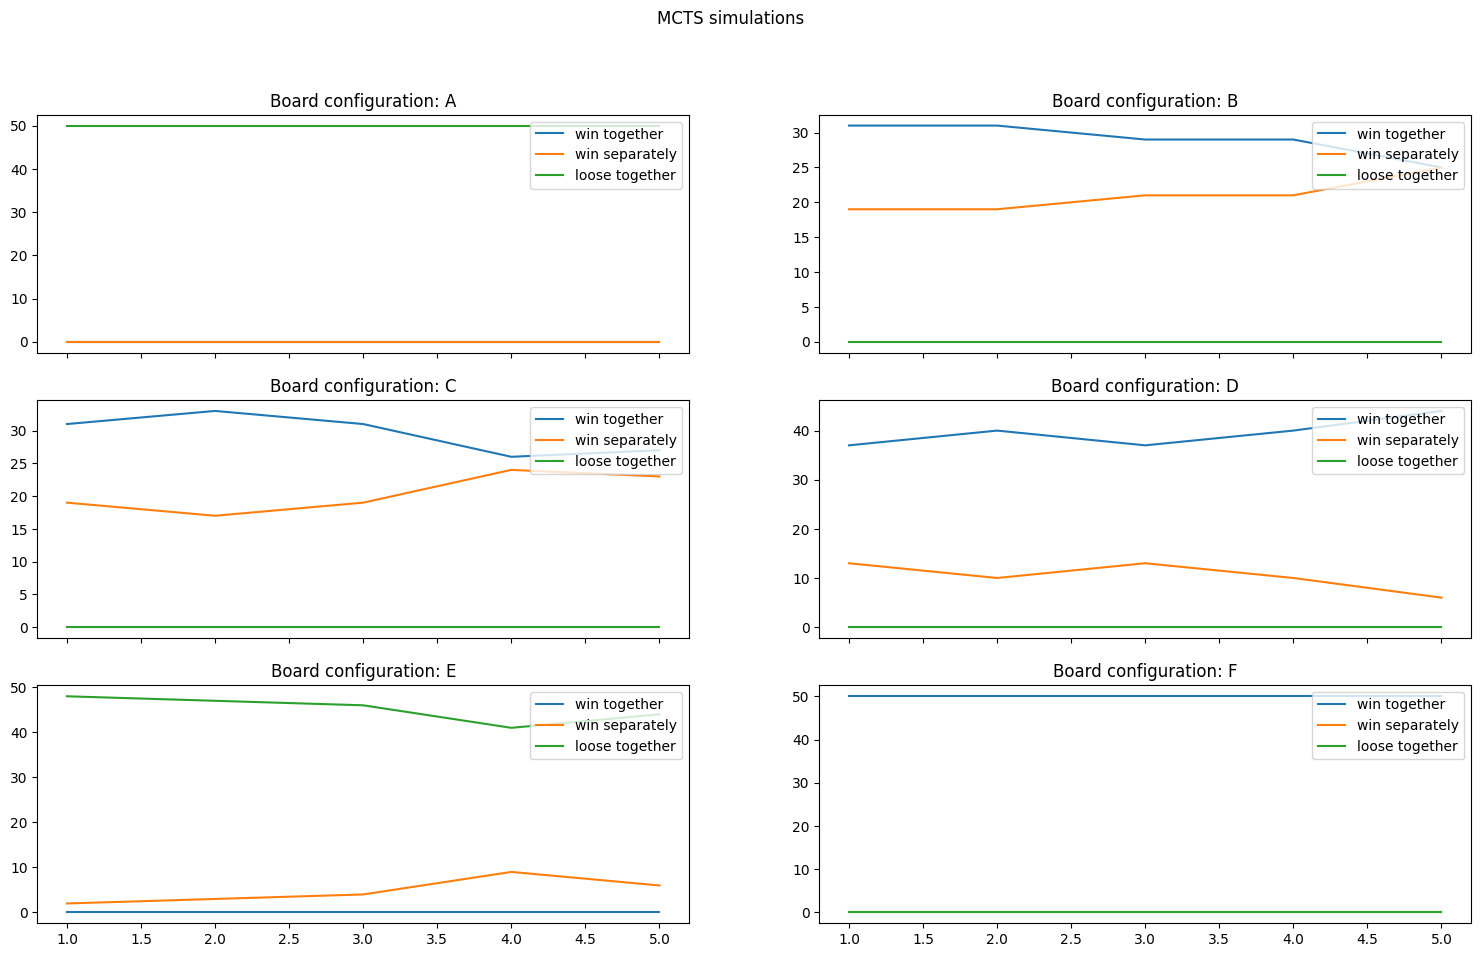

In [9]:
plt.show()

# Team MCTS

In [8]:
def run_for_config_team_mcts(config, max_level):
    win_together_rates = []
    ind_win_rates = []
    fail_together_rates = []

    for i in range(1, max_level):
        teams = config['team_players']
        ai_step = partial(team_mcts_step, teams=teams, num_simulations=i * 1000)
        config['team_players_ai'] = [ai_step, ai_step]
        config['ind_players_ai'] = [ai_step, ai_step]
        win_together, fail_together, ind_win = team_experiments.run_experiments(pool, config, 50)
        win_together_rates.append(win_together)
        ind_win_rates.append(ind_win)
        fail_together_rates.append(fail_together)

    return win_together_rates, ind_win_rates, fail_together_rates

In [9]:
fig, axs = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Team MCTS simulations')

max_level = 6

for init_config, ax in zip(configs, chain.from_iterable(axs)):
    win_together_rates, ind_win_rates, fail_together_rates = run_for_config_team_mcts(init_config, max_level)
    ax.plot(range(1, max_level), win_together_rates, label='win together')
    ax.plot(range(1, max_level), ind_win_rates, label='win separately')
    ax.plot(range(1, max_level), fail_together_rates, label='loose together')
    ax.legend(loc="upper right")
    ax.set_title(f'Board configuration: {init_config["name"]}')

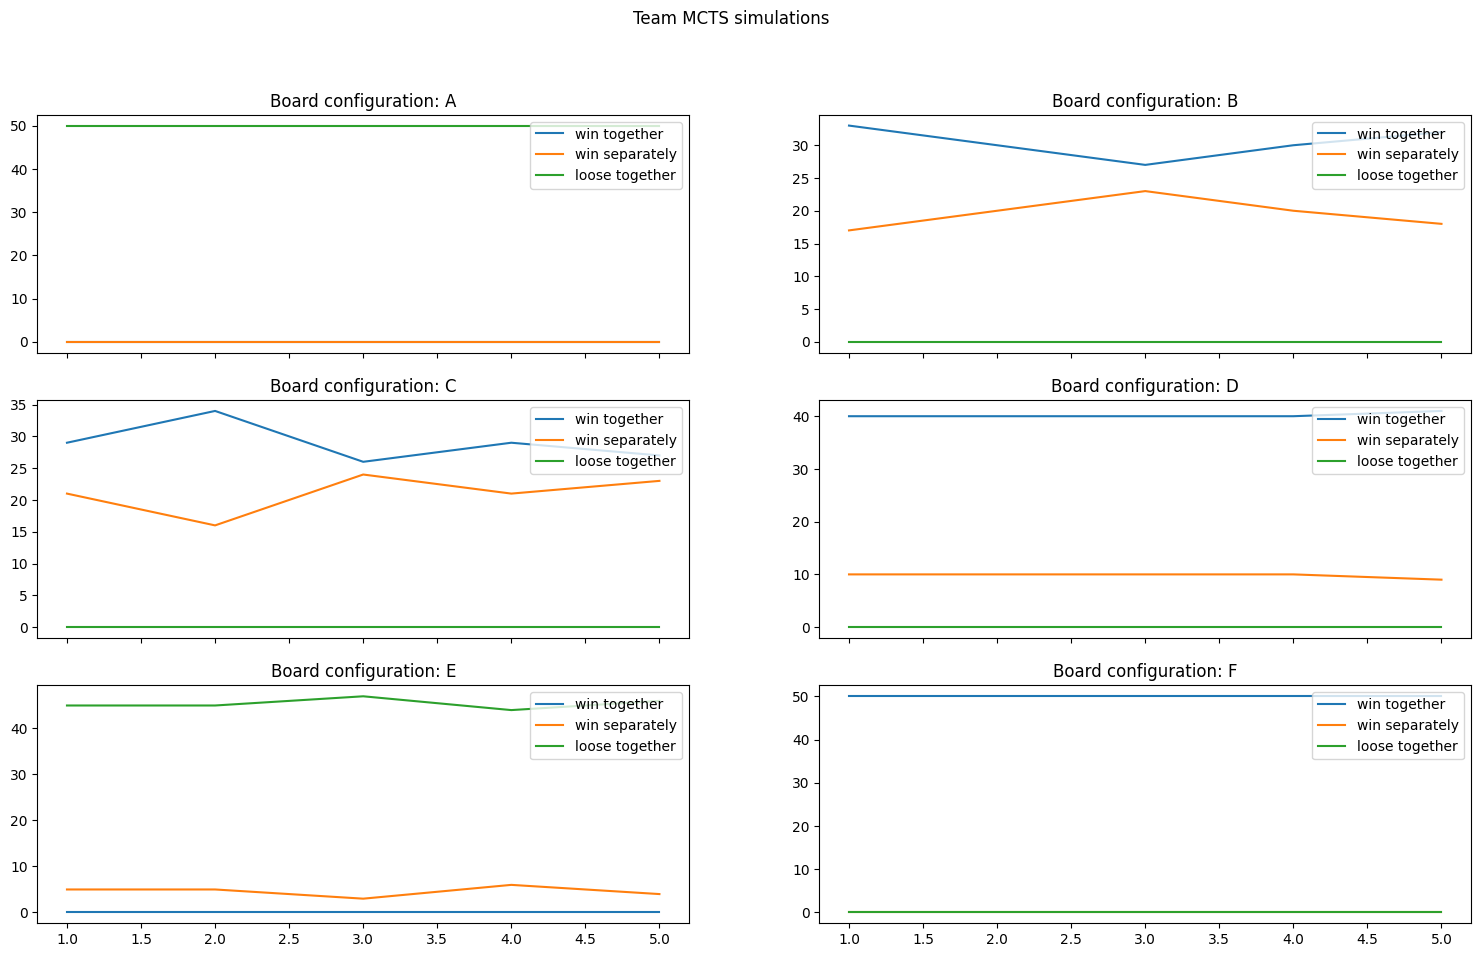

In [10]:
plt.show()

# Team Expecti-Maxn

In [8]:
def run_for_config_team_minimax(config, max_level):
    win_together_rates = []
    ind_win_rates = []
    fail_together_rates = []

    for i in range(1, max_level):
        teams = config['team_players']
        ai_step = partial(team_minimax_step, teams=teams, max_depth=i)
        config['team_players_ai'] = [ai_step, ai_step]
        config['ind_players_ai'] = [ai_step, ai_step]
        win_together, fail_together, ind_win = team_experiments.run_experiments(pool, config, 50)
        win_together_rates.append(win_together)
        ind_win_rates.append(ind_win)
        fail_together_rates.append(fail_together)

    return win_together_rates, ind_win_rates, fail_together_rates

In [9]:
fig, axs = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Team Expecti-Maxn simulations')

max_level = 6

for init_config, ax in zip(configs, chain.from_iterable(axs)):
    win_together_rates, ind_win_rates, fail_together_rates = run_for_config_team_minimax(init_config, max_level)
    ax.plot(range(1, max_level), win_together_rates, label='win together')
    ax.plot(range(1, max_level), ind_win_rates, label='win separately')
    ax.plot(range(1, max_level), fail_together_rates, label='loose together')
    ax.legend(loc="upper right")
    ax.set_title(f'Board configuration: {init_config["name"]}')

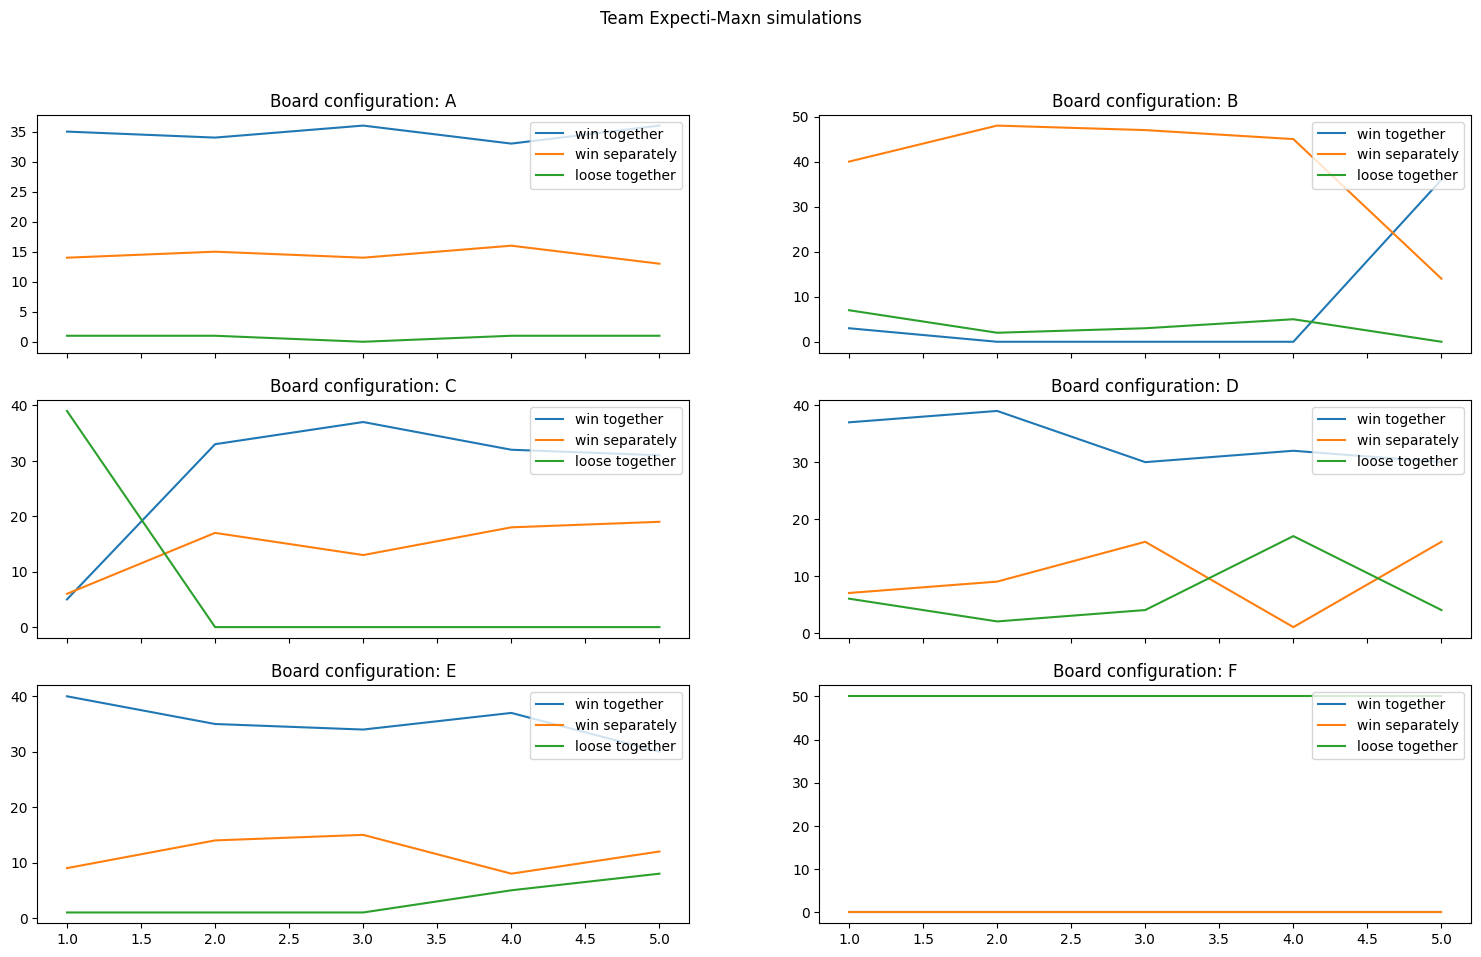

In [10]:
plt.show()